## Sentiwordnet mit Entfernen von Stopwords und Satzzeichen



In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
from nltk.corpus import stopwords
from string import punctuation 
# import gensim # representing documents as semantic vectors
from sklearn.metrics import *

from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/I570078/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/I570078/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/I570078/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/I570078/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Einstellung, um kompletten Inhalt der Spalte 'Text' anzuzeigen. 

In [2]:
pd.set_option('display.max_colwidth', None)

Einlesen der Daten

In [3]:
df_sentiwordnet_without_stopwords = pd.read_csv('../../Data-Preparation/traindata_without_stopwords_preprocessed.csv')

Überprüfung des Datensatzes

In [4]:
df_sentiwordnet_without_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

In [5]:
df_sentiwordnet_without_stopwords.head()

,Text,target,Ground_Truth_Label
0,Rise shining lol mins later planned rush door time,4,positive
1,2nd interview today looking promising,4,positive
2,feel pain,0,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive
4,lonely housemates gone pub,0,negative


Dieser Classifier bildet den Durchschnitt aller Wortbedeutungen (Lemma), die ein jeweiliges Wort haben kann und achtet somit nicht auf den Kontext, sondern gibt eher einen allgemeinen Durchschnitt der Wortbedeutung als Sentiment-Score an.

In [6]:
# Check the types of the entries in the 'Text' column
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      1273589
<class 'float'>       6411
Name: count, dtype: int64

In [7]:
df_sentiwordnet_without_stopwords['Text'] = df_sentiwordnet_without_stopwords['Text'].astype(str)


In [8]:
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    1280000
Name: count, dtype: int64

In [9]:
def naiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        numMeanings = 0
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            for meaning in synsets:
                pos_score = meaning.pos_score()
                neg_score = meaning.neg_score()
                if pos_score > neg_score:
                    weight += (pos_score - neg_score)
                    numMeanings += 1
                elif pos_score < neg_score:
                    weight -= (neg_score - pos_score)
                    numMeanings += 1
        else:
            numExceptions += 1
        if numMeanings > 0:
            reviewPolarity += (weight / numMeanings)
    return reviewPolarity

In [10]:
df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_without_stopwords['Text'].apply(lambda x: 'positive' if naiveSentiment(x) >= 0 else 'negative')


In [11]:
df_sentiwordnet_without_stopwords

,Text,target,Ground_Truth_Label,Sentiwordnet_Classification
0,Rise shining lol mins later planned rush door time,4,positive,positive
1,2nd interview today looking promising,4,positive,positive
2,feel pain,0,negative,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,positive
4,lonely housemates gone pub,0,negative,negative
...,...,...,...,...
1279995,held together bubblegum amp blessings,4,positive,positive
1279996,Heehee one,4,positive,positive
1279997,welcome change mind though let know,4,positive,positive
1279998,BET Bring Backup,4,positive,negative


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.60765703125


In [13]:
accuracy = accuracy_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')

In [14]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.61
Precision: 0.58
Recall: 0.79
F1 Score: 0.67


In [15]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.67      0.43      0.52    640000
    positive       0.58      0.79      0.67    640000

    accuracy                           0.61   1280000
   macro avg       0.62      0.61      0.59   1280000
weighted avg       0.62      0.61      0.59   1280000



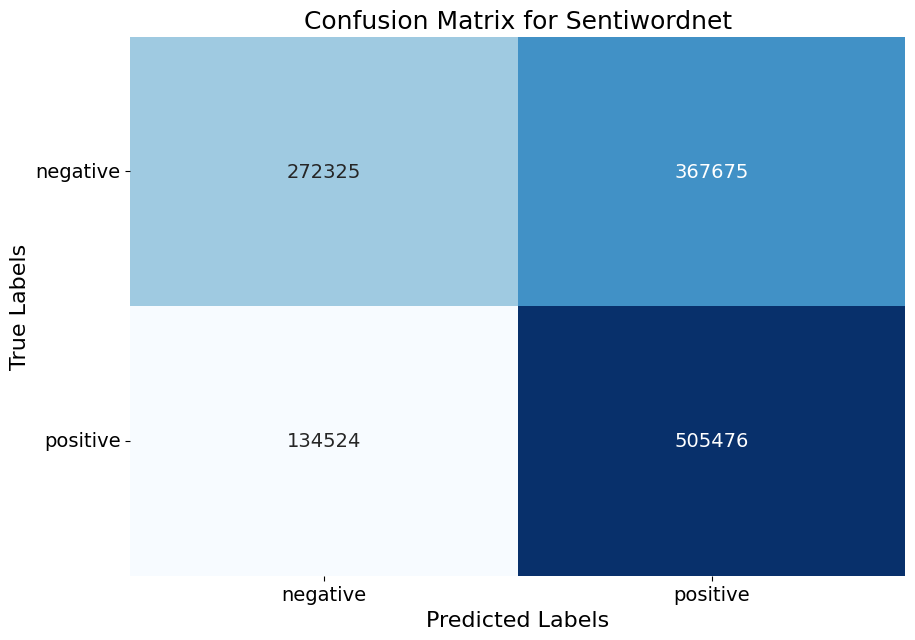

In [17]:
cm_nb = confusion_matrix(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet without stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()